## Lab 2
### UGBA 96: Data and Decisions

<img src="Ctrip-logo.png" alt="Drawing" style="width: 400px;"/>


Complete and submit this lab by 11:59pm, Monday, February 12th.

## Does Working From Home Work?


In this demonstration we will analyze data from a 2010 field experiment. Bloom et al. (2014) evaluate an experiment at Ctrip, China's largest travel agency. At the time of the study, the company had 16,000 employees and a $7 billion valuation.

Ctrip was considering allowing Working From Home (WFH) to save on office rent. However, they were worried that employees may not work as hard at home. To better understand what impact this policy would have, they ran an experiment.

The site for the experiment was Ctrip's airfare and hotel departments in Shanghai. These departments take calls and make bookings. Employees typically work 5 shifts a week in teams of about 15 people, plus a manager.

We'll analyze the experiment Ctrip ran in the next section and provide more details on how the experiment worked. For now, you only need to know that:
   * In order to qualify for WFH, employees must have their own room, broadband internet, and 6+ months of experience in their current position.
   * After the experiment ended, all qualifying workers were given the option to WFH or in the office.

*Dependencies:* 

Numpy

In [27]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Who Chooses to Work from Home?

<img src="shanghai_office.png" alt="Drawing" style="width: 400px;"/>
<center>Employees in Shanghai office</center>

<img src="wfh_example.png" alt="Drawing" style="width: 400px;"/>
<center>An employee working from home</center>

We will first look at data from after the experiment ended and compare workers that *chose* to work from home to those that *chose* to work at the office. In the absence of an experiment, it would be natural to compare performance for these two groups of workers to better understand the impact of WFH on productivity.

**1.** First, we'll read in the data from the experiment and see what we have.  The data are called "wfh_obs.csv".

In [8]:
workers = Table.read_table("wfh_obs.csv")

Each row corresponds to a specific employee, indexed by `personid`. Note the variables that are included in the data. Most are self-explanatory, but there are a couple that require some explanation:

   `wfh`: Whether the employee Works From Home. This takes a value of 1 for employees that WFH, and 0 for employees that work from the office. (Note: variables that only take the values `0` and `1` are called **dummy** or **indicator** variables. `wfh` is a 'dummy variable for whether an employee Works From Home.')

   `tenure`: Tenure at the company in months.
   
   `grosswage`: Gross wage (1000 Yuan).
   
   `bedroom`: Whether the employee has their own bedroom.
   
   `commute`: Commute time to and from office recorded in minutes.
   
   `high_educ`: College education and above.

**2.** Consider the columns available in the table that describe each worker. What categories of workers do you expect are more likely *to choose* to work from home?

**3.** Let's compare workers that choose to work from home to those that don't. Produce the averages for each column, grouped on `wfh`.

(Note: Use the parameter `collect` to calculate the averages. When you do this, some values won't appear. We'll discuss this issue next.)

In [18]:
print(np.average(workers.where("wfh",are.equal_to(1)).column('wfh')))
print(np.average(workers.where("wfh",are.equal_to(1)).column('tenure')))
print(np.average(workers.where("wfh",are.equal_to(1)).column('grosswage')))
print(np.average(workers.where("wfh",are.equal_to(1)).column('commute')))
print(np.average(workers.where("wfh",are.equal_to(1)).column('high_educ')))

print(np.average(workers.where("wfh",are.equal_to(0)).column('wfh')))
print(np.average(workers.where("wfh",are.equal_to(0)).column('tenure')))
print(np.average(workers.where("wfh",are.equal_to(0)).column('grosswage')))
print(np.average(workers.where("wfh",are.equal_to(0)).column('commute')))
print(np.average(workers.where("wfh",are.equal_to(0)).column('high_educ')))

workers.group("wfh",np.mean)

1.0
29.7227272727
3.10118454273
116.568181818
0.409090909091
0.0
24.4219457014
2.83186895756
76.0727375564
0.418552036199


wfh,personid mean,age mean,tenure mean,grosswage mean,children mean,bedroom mean,commute mean,men mean,married mean,high_educ mean
0,30964.3,22.9808,24.4219,2.83187,,,76.0727,0.311086,0.132353,0.418552
1,28229.5,25.1727,29.7227,3.10118,,,116.568,0.418182,0.3,0.409091


This table has some of the right values, but seems to be missing certain values. This is because the **np.mean function ** can only take in numerical arguments. For `children` and `bedroom`, the problem is that the values are recorded as 'yes' and 'no'. This is a **boolean** column--it only takes two values that indicate `TRUE` or `FALSE`. We can deal with these issues by turning `children` and `bedroom` from boolean into numeric variables.

We can start by modifying the `children` and `bedroom` columns, so that they contain a `1` for a 'yes' and a `0` for a 'no'.


This is done by:

1) Converting the variable into a boolean (TRUE/FALSE) based on the membership criteria we described above

2) Using built-in packages to convert arrays of booleans into 1s and 0s

3) Replacing the named columns with the transformed values

In [13]:
#this cell converts and children and bedroom into 0/1 variables and stores them in the table workers_clean
worker_children = np.int32(workers.column('children') == 'yes')
worker_bedroom = np.int32(workers.column('bedroom') == 'yes')

workers_clean = workers.with_columns(['children', worker_children, 'bedroom', worker_bedroom])
workers_clean

personid,wfh,age,tenure,grosswage,children,bedroom,commute,men,married,high_educ
3906,1,33,96,2.73755,1,1,180,0,1,0
4122,1,30,94,4.09625,0,0,180,0,0,0
4448,1,35,92,4.2693,1,1,100,0,1,0
4942,1,27,82,5.2954,0,1,160,0,1,0
5018,1,29,82,1.38759,1,1,240,0,1,0
5614,0,32,79,3.82601,0,1,80,1,1,0
6362,0,29,82,4.89471,1,1,200,0,1,0
6364,1,26,82,6.22075,1,1,180,0,1,0
7068,0,28,72,4.34182,0,1,40,0,1,1
7076,1,30,72,2.66415,1,1,120,0,1,1


<br>

Then we can re-compute the means using the cleaned up data. Use the same calculations to group and calculate averages as above.

<br>

In [20]:
workers_clean.group("wfh",np.mean)

wfh,personid mean,age mean,tenure mean,grosswage mean,children mean,bedroom mean,commute mean,men mean,married mean,high_educ mean
0,30964.3,22.9808,24.4219,2.83187,0.0735294,0.556561,76.0727,0.311086,0.132353,0.418552
1,28229.5,25.1727,29.7227,3.10118,0.172727,0.990909,116.568,0.418182,0.3,0.409091


** 4. ** How do these differences compare to your expectations described in question **(2)**?

Let's take a closer look at one column in particular, `commute`. Recall that this measures an employee's normal commute time to the office in minutes. The average value for `commute` is substantially larger among those who choose to work from home. This is not too surprising--the more painful the *commute*, the more willing we would expect someone to be to avoid it. 

This is a form of **selection bias**. When we compare workers that *choose* to work from home to workers that *choose* to come into the office, we are not comparing like with like. We would like to determine the *causal effect* of working from home on employee productivity. But comparing these two groups of workers alone probably won't get us there. Productivity may differ between the two groups for reasons beyond work location. Can you think of reasons why? 

In particular, using the notation from class, we may worry that:

$$E[Y_{i0} | \, i  \text{ is Work From Home}] \ne E[Y_{i0} | \, i \text{ is Work From Office}]$$

Where $Y$ is productivity, and $Y_{0}$ is productivity under the control condition, that is while *working from the office*. Recall that quantity on the left--the *counterfactual* productivity for employees that Work From Home if they were to work in the office--is something that we *do not observe*. So, we can't actually check whether the two quantities differ.

Why may those two quantities be different? For example, those who were willing to commute such a long distance in the first place may tend to be more dedicated employees. On the other hand, those with longer commutes may be less productive in the office because they are more fatigued.

## Solution: Run an Experiment

<img src="drawing.png" alt="Drawing" style="width: 400px;"/>

<center>The lottery drawing</center>

**Selection bias** makes it difficult to measure the causal effect of a treatment. As we discussed in lecture, the best solution to the problem of selection bias is to run an **experiment.** This makes treatment assignment *independent* of potential outcomes. Let's discuss Ctrip's experiment in more detail.

To recruit participants in the experiment, Ctrip asked 996 employees if they wanted to work from home 4 days a week. 508 volunteered. To participate in the experiment, Ctrip also required that the employee met additional requirements, including having their own room, broadband internet, and 6+ months of experience in the position. The final experiment group consisted of 255 employees.

The **treatment group** worked 4 shifts a week at home and 1 shift a week in the office, for 9 months.

The **control group** worked all 5 shifts in the office.

Otherwise treatment and control groups were identical: they had the same shift, same equipment, same work-flow, and same pay structure.

To assign employees to the treatment and control groups, Ctrip held a lottery. After a drawing, employees with even birthdays were assigned to the WFH treatment, while those with odd birthdays were assigned to the control group, and worked in the office as before.

Let's analyze the results.

**5.** First, let's read in the data from the experiment. The set of columns are similar, with some differences. We'll transform `children` and `bedroom` as above.

In [21]:
experiment = Table.read_table('wfh_exp.csv')

#fill in the blanks here
exp_children = np.int32(experiment.column('children') == 'yes')
exp_bedroom = np.int32(experiment.column('bedroom') == 'yes')


experiment_clean = experiment.with_columns(['children', exp_children, 'bedroom', exp_bedroom])
experiment_clean

personid,treatment,performance,performance_pre,age,tenure,basewage,costofcommute,children,bedroom,expgroup,men,married
3906,1,0.282896,0.084573,33,96,1883.33,8,1,1,1,0,1
4122,1,0.738238,0.000449883,30,94,1700,18,0,0,1,0,0
4448,0,0.471599,0.45591,35,92,1750,10,1,1,0,0,1
4942,1,-0.253705,0.91851,27,82,1900,20,0,1,1,0,1
5018,1,-0.606368,-0.377443,29,82,2138.89,15,1,1,1,0,1
5614,1,0.427841,0.36998,32,79,1700,0,0,1,1,1,1
6278,0,-0.101817,-0.0400528,32,77,1700,12,1,1,0,0,1
6362,0,-0.620063,0.655319,29,82,1850,12,1,1,0,0,1
6364,0,-0.159484,1.40904,26,82,1900,12,1,1,0,0,1
7068,0,-0.9852,0.270699,28,72,1950,0,0,1,0,0,1


Here the variable `treatment` indicates whether an individual was assigned to the treatment group. A value of 0 means the employee was assigned to the control group. A value of 1 means he or she was assigned to the treatment group.

We also have two measures of performance, `performance_pre` and `performance`. The scale for these measures requires some explanation. 

These measures summarize a variety of performance metrics, including the number of phone calls an employee answers, the number of orders taken, and the number of reservation phone calls made. Those performance metrics are combined into one index and then *normalized* to have mean 0 and standard deviation 1 over a period *prior to* the experiment. For example, a `performance` value of 1 would mean an employee had a performance level that was one standard deviation *greater* than the average employee during the pre-experiment period. A negative value of -1 would indicate a performance level that was one standard deviation *lower* than the average employee during the pre-experiment period.

`performance_pre` and `performance` differ in the work period that they cover:

`performance_pre`: This is a summary metric of an employee's work performance *prior to* the experiment.

`performance`: This is a summary metric of an employee's work performance *during* the experiment. It uses the same normalization as `performance_pre`.

Another note on these data: rather than `commute` from before, we now have a `costofcommute`, which measures the cost of an employee's commute in Yuan.

<br>

**6.** Compare average characteristics for workers in the treatment and control groups. This can still be done with the group function.

In [22]:
treatment_vs_control = experiment_clean.group("treatment",np.mean)
treatment_vs_control

treatment,personid mean,performance mean,performance_pre mean,age mean,tenure mean,basewage mean,costofcommute mean,children mean,bedroom mean,expgroup mean,men mean,married mean
0,28865,-0.401291,-0.0401317,24.3475,28.2542,1562.8,8.33783,0.237288,0.991525,0,0.466102,0.322034
1,30299.2,-0.0513644,-0.0284502,24.4351,26.1374,1539.86,7.89174,0.114504,0.969466,1,0.465649,0.221374


Checking for whether treatment and control units look similar is called **checking for balance**. It is common practice when estimating causal effects.

In general, the two groups of workers are more comparable than the two groups we compared in the previous section. This is to be expected given the (mostly) random assignment of employees to the treatment and control groups. We would not expect people born on even and odd days to be systematically different.

Note that there are still some noticeable differences between the treatment and control groups. In particular, the control group is more likely to have children and to be married. These kinds of differences may emerge by chance, even under random assignment. But could they reflect systematic differences between employees born on even and odd days? Later on in Data 8 and this course, we'll discuss how to evaluate the size of these differences.

### Changes in Productivity?

Finally, let's examine how worker *performance* compares in the treatment and control groups. Performance during the experiment period is reported in the column `performance`.

**7. ** Make a bar chart that plots the averages of `performance_pre` and `performance` for the treatment and control groups. In total, your figure should include four bars.

You can use the treatment_vs_control table created earlier, however you need to be sure to only select the relevant columns, which are `treatment` , `performance mean`, and `performance_pre mean`. The call will look like *table.select().barh()*.

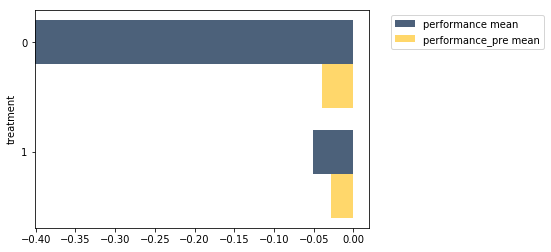

In [79]:
#bar chart of baseline experiment period performance by treatment group
treatment_vs_control.select("treatment","performance mean","performance_pre mean").barh(0)

At baseline, productivity in the treatment and control groups are quite similar. This is what we should expect under random assignment.

However, during the experiment period *large differences* in productivity emerge. In particular, `performance` is large in magnitude and *negative* in the control group. This indicates that, for whatever reason, average productivity was lower in the control group during the experiment period than in the baseline period. This might reflect that the experiment happened to coincide with a down period for the company.

By contrast, the `peformance` in the treatment group is mostly unchanged.

**The difference in `performance` between the treatment and control groups reflects the *causal* effect of working from home on productivity. Our estimate for the causal effect of WFH is that it increases average performance by about 0.35 standard deviations.** This corresponds to about 15% more calls handled per day.

### What Did Ctrip Learn?

The overall impact of WFH was quite positive. The firm improved productivity by between 20% to 30% and saved about
$2,000 a year per employee that was working from home. These gains came from the reduction in required office space, improved employee performance, and reduced turnover. [We will discuss the turnover results in more detail when we discuss Attrition in Week 7.]

The success of the experiment led Ctrip to offer the option to work from home to all qualifying employees. They also allowed treatment group employees to return to the office.

In what was a surprise to management, despite the gains in performance, after the experiment half of treatment group employees decided to return to the office, and two thirds of the control group (who had earlier volunteered to work from hom) decided to stay in the office. The primary reason for switching was the concern over the loneliness and social isolation of working from home. Treatment group workers that performed badly while working at home were also more likely to switch back to office work.

<img src="post_experiment.png" alt="Drawing" style="width: 500px;"/>

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('lab2.ok')
_ = ok.auth(inline=True)
_ = ok.submit()

Assignment: Lab 2
OK, version v1.12.5


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

